In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
hh_mm = DateFormatter('%H:%M')

# Defining the deformation of the sensor

In [2]:
# This routine calculates the theoretical deformation of an aluminum block of 4mm side
def alu_def(delta_temp):
    defor = delta_temp * 4/100 * 25/1000000
    return defor

# Importing the sensor data
This experiment was run in an oven which temperature could be controlled

In [3]:
df = pd.read_csv("textdata.txt", header = None,names=["year", "month", "day", "hour", "minute", "v1", "v2", "ratio", "temperature","RH"])
df["DateTime"] = pd.to_datetime(df[["year","month", "day", "hour", "minute"]])
df = df.iloc[15:] # select only from the 15th since data before that are weird

In [4]:
facteur = 12778.71159802416 # this is to convert from sensor values to µm -> see the calibration of the sensor

In [5]:
df["distance"] = ((df["ratio"].values[15] - df["ratio"]) * facteur) # calculate a displacement from raw sensor values
df["delta_temp"] = (df["temperature"]-df["temperature"].values[15]) # temperature delta since beginning of experiment
df["defor_theor"] = alu_def(df["delta_temp"])*1000000 # theoretical deformation of the aluminum block
df = df[15:] # select only data after 15

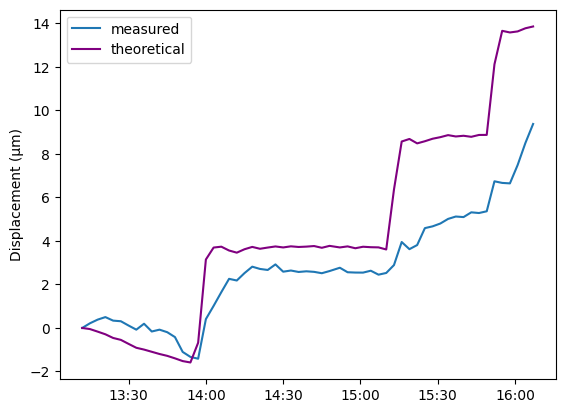

In [12]:
fig, ax = plt.subplots()
ax.plot(df["DateTime"], df["distance"], label = "measured")
ax.plot(df["DateTime"], df["defor_theor"], color = "purple", label = "theoretical")
ax.set_ylabel("Displacement (µm)")
ax.legend()
#ax1 = ax.twinx()
#ax1.plot(df["DateTime"], df["delta_temp"], color = "red")
#ax.set_xlabel("Time")
ax.xaxis.set_major_formatter(hh_mm)
fig.savefig("Dendro.png")


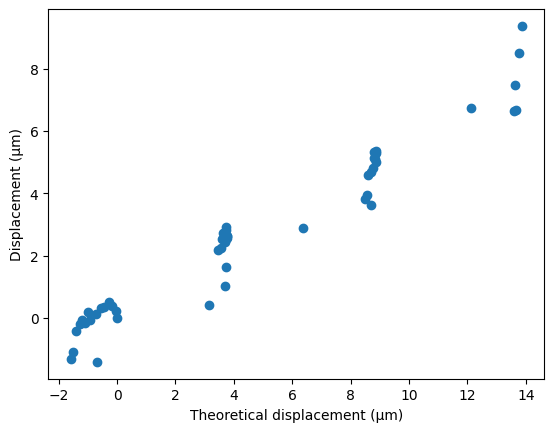

In [10]:
fig, ax = plt.subplots()
ax.scatter( df["defor_theor"], df["distance"])
ax.set_xlabel("Theoretical displacement (µm)")
ax.set_ylabel("Displacement (µm)")
plt.show()

# Calcluating calibration coefficients

In [14]:
calib = df
calib["surplus"] = calib["distance"] - calib["defor_theor"] # we calulate the displacement that is not due to the thermal deformation of the aluminum block

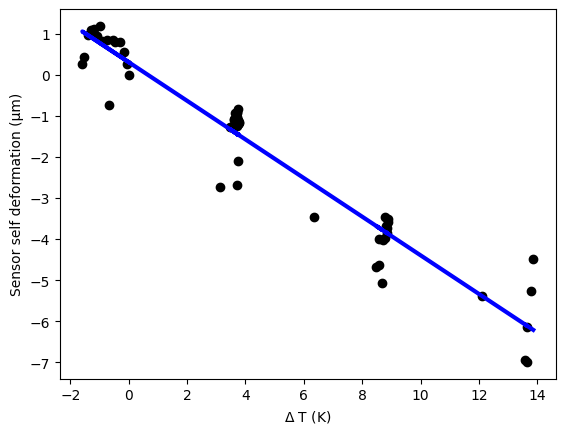

In [16]:
from sklearn.linear_model import LinearRegression
x = calib.delta_temp.values
y = calib.surplus.values
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)
regr = LinearRegression()
regr.fit(x, y)
# plot it as in the example at http://scikit-learn.org/
fig, ax = plt.subplots()
ax.scatter(x, y,  color='black')
ax.plot(x, regr.predict(x), color='blue', linewidth=3)
ax.set_xlabel("$\Delta$ T (K)")
ax.set_ylabel("Sensor self deformation (µm)")
fig.savefig("calib.png")
#plt.xticks(())
#plt.yticks(())
plt.show()


The temperature response of the sensor is around 0.47 µm per °C. So for a 10°C difference there are 4 microns that are lost to the sensor.

In [ ]:
print("The slope is:")
print(regr.coef_[0][0]) # the slope of the regression